<a href="https://colab.research.google.com/github/darioamadori/FraudDetection/blob/main/FraudDetenction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Preliminary Operations

- **Divide the Dataset**: Before beginning your analysis, it's crucial to split the dataset into three subsets:
  - **Training set**: Used to train the model.
  - **Validation set**: Used for model validation during training and for tuning parameters.
  - **Test set**: Used only at the end to test the model’s performance and ensure that the results can be generalized.

- **Load Data and Consistency Checks**: Load the dataset from your storage and perform checks to verify data integrity, such as checking for missing values or inconsistencies in data types.

- **Select and Normalize Inputs**: Select the relevant variables for the analysis and apply normalization techniques, such as Z-score normalization, to make the data more uniform and facilitate model learning.

- **Shuffle the Data**: It is good practice to shuffle the data before splitting it into training, validation, and test sets to avoid any ordering or grouping bias.

- **Generate the Output**: Define and prepare the labels that the model will use for learning, such as "fraudulent" or "non-fraudulent".

- **Explore Selected Data**: Use scatter plots to visualize relationships between different features and to get a preliminary understanding of data distribution and potential correlations.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Connect to drive and retrieve the dataset
from google.colab import drive

drive.mount('/content/drive')

path = '/content/drive/MyDrive/Colab Notebooks/transactionsFraud/Fraudulent_E-Commerce_Transaction_Data.csv'
dataset = pd.read_csv(path)
dataset.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124,20
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158,5


In [45]:
# Create the X and Y set, dropping the target column
X = dataset
X = X.drop('Is Fraudulent', axis=1)

Y = (dataset['Is Fraudulent'].values == 1)

# Print the first few rows of the X dataframe
print("First few rows of X:")
print(X.head())

# Print the first few rows of the Y dataframe
print("\nFirst few rows of Y:")
print(Y)

First few rows of X:
                         Transaction ID                           Customer ID  \
0  15d2e414-8735-46fc-9e02-80b472b2580f  d1b87f62-51b2-493b-ad6a-77e0fe13e785   
1  0bfee1a0-6d5e-40da-a446-d04e73b1b177  37de64d5-e901-4a56-9ea0-af0c24c069cf   
2  e588eef4-b754-468e-9d90-d0e0abfc1af0  1bac88d6-4b22-409a-a06b-425119c57225   
3  4de46e52-60c3-49d9-be39-636681009789  2357c76e-9253-4ceb-b44e-ef4b71cb7d4d   
4  074a76de-fe2d-443e-a00c-f044cdb68e21  45071bc5-9588-43ea-8093-023caec8ea1c   

   Transaction Amount     Transaction Date Payment Method Product Category  \
0               58.09  2024-02-20 05:58:41  bank transfer      electronics   
1              389.96  2024-02-25 08:09:45     debit card      electronics   
2              134.19  2024-03-18 03:42:55         PayPal    home & garden   
3              226.17  2024-03-16 20:41:31  bank transfer         clothing   
4              121.53  2024-01-15 05:08:17  bank transfer         clothing   

   Quantity  Customer A

## Preliminary Data Preprocessing Steps:

1. **Remove Irrelevant Features**: Eliminate features not significant for classifying a transaction as fraudulent, such as Customer ID, Transaction ID, and IP Address.


In [46]:
# remove 'Customer ID', 'Transaction ID' and 'IP Address' columns because
# they are not significative
X = X.drop(['Customer ID', 'Transaction ID', 'IP Address'], axis=1)

2. **Extract Date Information**: From the Transaction Date feature, extract day and month, which might correlate with fraud frequency.


In [47]:
# Convert date string to a pandas datetime object
X['Transaction Date'] = pd.to_datetime(X['Transaction Date'])

X['Month'] = X['Transaction Date'].dt.month
X['Day'] = X['Transaction Date'].dt.day
# Monday is 0, ..., Sunday is 6
X['Weekday'] = X['Transaction Date'].dt.weekday
X['Hour'] = X['Transaction Date'].dt.hour

X = X.drop(['Transaction Date'], axis=1)

3. **Address Features**: Remove Shipping and Billing Address fields and add a feature indicating whether they coincide.


In [48]:
X['Addresses Match'] = (X['Shipping Address'] == X['Billing Address']).astype(int)
X.drop(['Shipping Address', 'Billing Address'], axis=1, inplace=True)
X.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,Account Age Days,Transaction Hour,Month,Day,Weekday,Hour,Addresses Match
0,58.09,bank transfer,electronics,1,17,Amandaborough,tablet,30,5,2,20,1,5,1
1,389.96,debit card,electronics,2,40,East Timothy,desktop,72,8,2,25,6,8,1
2,134.19,PayPal,home & garden,2,22,Davismouth,tablet,63,3,3,18,0,3,1
3,226.17,bank transfer,clothing,5,31,Lynnberg,desktop,124,20,3,16,5,20,1
4,121.53,bank transfer,clothing,2,51,South Nicole,tablet,158,5,1,15,0,5,1


4. **One-Hot Encoding**: Convert categorical variables into a numerical format using one-hot encoding, enabling the model to effectively process these variables.

In [49]:
from sklearn.preprocessing import LabelEncoder

# Hot Encoding
X = pd.get_dummies(X, columns=['Payment Method', 'Product Category', 'Device Used'])

label_encoder = LabelEncoder()

# Addestramento del LabelEncoder sui dati di Customer Location e trasformazione dei dati
X['Customer Location Encoded'] = label_encoder.fit_transform(X['Customer Location'])
X.drop(['Customer Location', ], axis=1, inplace=True)

X.head()

,Transaction Amount,Quantity,Customer Age,Account Age Days,Transaction Hour,Month,Day,Weekday,Hour,Addresses Match,...,Payment Method_debit card,Product Category_clothing,Product Category_electronics,Product Category_health & beauty,Product Category_home & garden,Product Category_toys & games,Device Used_desktop,Device Used_mobile,Device Used_tablet,Customer Location Encoded
0,58.09,1,17,30,5,2,20,1,5,1,...,False,False,True,False,False,False,False,False,True,663
1,389.96,2,40,72,8,2,25,6,8,1,...,True,False,True,False,False,False,True,False,False,17313
2,134.19,2,22,63,3,3,18,0,3,1,...,False,False,False,False,True,False,False,False,True,6790
3,226.17,5,31,124,20,3,16,5,20,1,...,False,True,False,False,False,False,True,False,False,36744
4,121.53,2,51,158,5,1,15,0,5,1,...,False,True,False,False,False,False,False,False,True,82691


5. **Shuffle Data and Split into Three Parts:**

 Shuffling the data before splitting helps avoid biases related to the order or distribution of observations, ensuring a more uniform distribution of features across different data subsets. Additionally, dividing the dataset into three parts: training, validation, and testing, allows for effective model training, fine-tuning of model parameters, and independent assessment of model performance, respectively.

In [50]:
from sklearn.utils import shuffle
X, t = shuffle(X, Y, random_state=0) # this time we have to do it! (we will use sequential algorithms)

When preprocessing your dataset for model training, **it's crucial to apply the same transformations to the training, validation** and test sets. However, parameters for these transformations, like those used in normalization, should only be derived from the training set to avoid data leakage. This ensures that your model evaluations are unbiased and truly reflective of its performance on unseen data.

There are operations that can be done before splitting the dataset into 3 parts, operations that do not depend on the data distribution such as column removal, feature extraction, one hot encoding (only if you do NOT add labels that were not present in the train set .

Instead, there are operations such as normalization that must be done after the split and only on the train Set

In [51]:
# Divide the DataSet into 3 parts: TRAIN, VALIDATION, TEST
from sklearn.model_selection import train_test_split

# First divide into train and temp (the latter will be further divided into test and validation)
# 70% train, 30% temp
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3)
# Now divide the temp into validation and test
# 30% temp split into 15% validation and 15% test
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5)

# Stampa le dimensioni per confermare la corretta suddivisione
print("Training set size: X_train:", X_train.shape, ", Y_train:", Y_train.shape)
print("Validation set size: X_val:", X_val.shape, ", Y_val:", Y_val.shape)
print("Test set size: X_test:", X_test.shape, ", Y_test:", Y_test.shape)
# .shape() returns a tuple (n_rows, n_col)

Training set size: X_train: (1031066, 23) , Y_train: (1031066,)
Validation set size: X_val: (220943, 23) , Y_val: (220943,)
Test set size: X_test: (220943, 23) , Y_test: (220943,)


6. **Normalize Variables**: Apply normalization to all variables to ensure uniform data scale.


In [52]:
from scipy.stats import zscore
import numpy as np
import pandas as pd

# Divide the dataset into numeric and boolean parts
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_train_bool = X_train.select_dtypes(include=['bool'])
X_test_numeric = X_test.select_dtypes(include=[np.number])
X_test_bool = X_test.select_dtypes(include=['bool'])


# Compute the mean value for each numeric column
means = X_train_numeric.mean()

# Replace NaN values with the corresponding mean value in each column
X_train_numeric = X_train_numeric.fillna(means)
X_test_numeric = X_test_numeric.fillna(means)  # 'means' calculated from X_train


# Apply Z-score normalization
X_train_numeric_normalized = zscore(X_train_numeric)
# Normalization for X_test
stds = X_train_numeric.std()
X_test_numeric_normalized = (X_test_numeric - means) / stds

# Convert the numpy array returned by zscore back into a pandas DataFrame
X_train_numeric_normalized = pd.DataFrame(X_train_numeric_normalized, columns=X_train_numeric.columns)
X_test_numeric_normalized = pd.DataFrame(X_test_numeric_normalized, columns=X_test_numeric.columns)

# Reset index to align the indices
X_train_numeric_normalized.reset_index(drop=True, inplace=True)
X_train_bool.reset_index(drop=True, inplace=True)
X_test_numeric_normalized.reset_index(drop=True, inplace=True)
X_test_bool.reset_index(drop=True, inplace=True)


# Concatenate the DataFrames along columns
X_train_final = pd.concat([X_train_numeric_normalized, X_train_bool], axis=1)
X_test_final = pd.concat([X_test_numeric_normalized, X_test_bool], axis=1)


print("Number of columns in the DataFrame:", X_train_final.shape[1])
X_train_final.head()


Number of columns in the DataFrame: 23


,Transaction Amount,Quantity,Customer Age,Account Age Days,Transaction Hour,Month,Day,Weekday,Hour,Addresses Match,...,Payment Method_credit card,Payment Method_debit card,Product Category_clothing,Product Category_electronics,Product Category_health & beauty,Product Category_home & garden,Product Category_toys & games,Device Used_desktop,Device Used_mobile,Device Used_tablet
0,-0.087512,1.412834,1.348635,0.818052,-0.471125,-1.204208,1.194286,0.523743,-0.500405,0.333989,...,True,False,True,False,False,False,False,False,True,False
1,0.030736,-1.413750,-0.351565,1.548062,0.962716,-0.058415,0.522977,-0.969124,0.943423,0.333989,...,False,False,False,False,True,False,False,True,False,False
2,-0.498006,-0.000458,-0.151541,-0.875946,-1.331430,1.087378,0.411092,-0.969124,1.665337,0.333989,...,False,False,False,False,True,False,False,False,True,False
3,-0.577888,0.706188,0.848576,0.593434,-0.327741,-1.204208,1.082401,0.026121,-0.356022,0.333989,...,True,False,False,False,True,False,False,False,False,True
4,-0.350289,1.412834,0.248506,-1.025691,1.392868,-0.058415,-0.707757,0.523743,1.376572,0.333989,...,False,False,True,False,False,False,False,True,False,False


# 2. Lasso - Regularization Method

- **Regularization Methods**: Use Lasso (L1) to prevent model overfitting during logistic regression training. These methods add a penalty term to the cost function, reducing the impact of less important features. In logistic regression, this is achieved by specifying the penalty parameter as 'l1' when configuring the model. This helps in managing feature selection and mitigating the risk of overfitting by penalizing the absolute value of the regression coefficients.

# 3. Logistic Regression

**Train the Logistic Regression Model:** Configure and train a Logistic Regression model with L1 regularization (penalty='l1'). This method assists in feature selection by shrinking less important feature coefficients to zero, simplifying the model.

In [53]:
from sklearn.linear_model import LogisticRegression
log_classifier_l1 = LogisticRegression(penalty='l1', solver='liblinear')
log_classifier_l1.fit(X_train_final, Y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [54]:
# Weights of the features:
features = X_train_final.columns
# It contains the model weights
weights = log_classifier_l1.coef_[0]

# Print the weights corresponding to each feature
for feature, weight in zip(features, weights):
    print(f"Feature '{feature}'  weight = {weight:.2f}")

Feature 'Transaction Amount'  weight = 0.00
Feature 'Quantity'  weight = 0.01
Feature 'Customer Age'  weight = -0.01
Feature 'Account Age Days'  weight = 0.01
Feature 'Transaction Hour'  weight = -0.02
Feature 'Month'  weight = -0.00
Feature 'Day'  weight = 0.00
Feature 'Weekday'  weight = 0.00
Feature 'Hour'  weight = 0.01
Feature 'Addresses Match'  weight = -0.00
Feature 'Customer Location Encoded'  weight = -0.00
Feature 'Payment Method_PayPal'  weight = -0.85
Feature 'Payment Method_bank transfer'  weight = -0.85
Feature 'Payment Method_credit card'  weight = -0.85
Feature 'Payment Method_debit card'  weight = -0.85
Feature 'Product Category_clothing'  weight = -1.06
Feature 'Product Category_electronics'  weight = -1.06
Feature 'Product Category_health & beauty'  weight = -1.05
Feature 'Product Category_home & garden'  weight = -1.07
Feature 'Product Category_toys & games'  weight = -1.07
Feature 'Device Used_desktop'  weight = -0.91
Feature 'Device Used_mobile'  weight = -0.88
Fe

In [55]:
fraud = X_train_final[Y_train]
not_fraud = X_train_final[~Y_train]

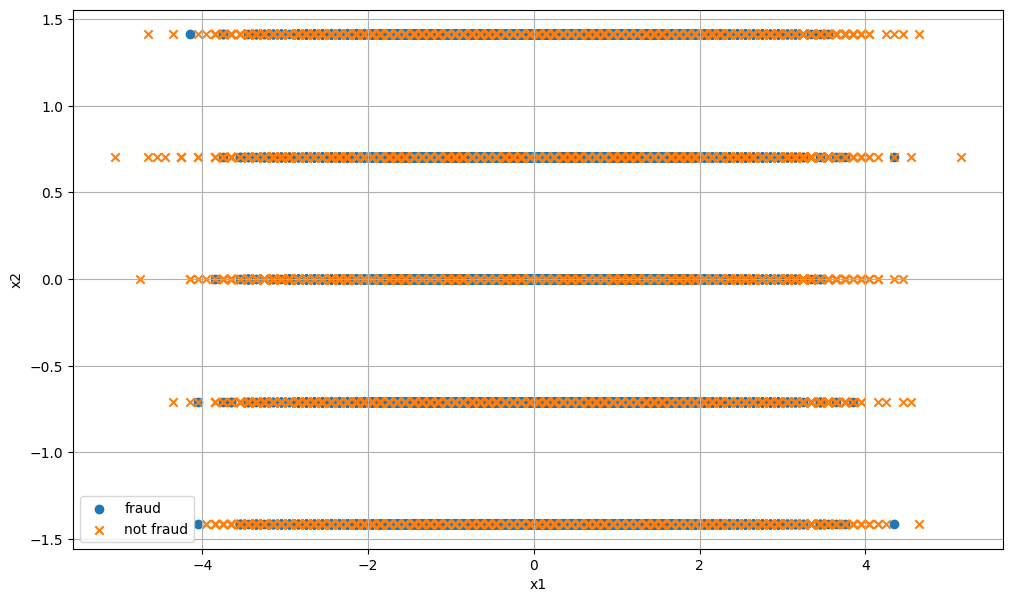

In [60]:
plt.figure(figsize=(12,7))
plt.scatter(fraud['Customer Age'], fraud['Quantity'], label='fraud')
plt.scatter(not_fraud['Customer Age'], not_fraud['Quantity'], label='not fraud', marker='x')

plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.legend()
plt.show()

# 4. Evaluating the Results

- **Test the Model on the Test Set**: After optimizing the model using the validation set, evaluate its final performance on the test set to see how it performs on previously unseen data. Use metrics such as accuracy, precision, recall, and F1-score to measure the effectiveness of the model in classifying fraudulent transactions.


In [57]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Previsioni sul test set
Y_pred = log_classifier_l1.predict(X_test_final)

# Calcolo delle metriche di base
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Report più dettagliato
report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", report)

# Matrice di confusione
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

# AUC-ROC, solo se le previsioni e le etichette sono binarie
# Assicurati che Y_test e Y_pred siano formattati correttamente come 0 e 1.
if len(set(Y_test)) == 2:
    roc_auc = roc_auc_score(Y_test, log_classifier_l1.predict_proba(X_test_final)[:, 1])
    print("ROC-AUC Score:", roc_auc)

Accuracy: 0.9492538799599897


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

       False       0.95      1.00      0.97    209731
        True       0.00      0.00      0.00     11212

    accuracy                           0.95    220943
   macro avg       0.47      0.50      0.49    220943
weighted avg       0.90      0.95      0.92    220943

Confusion Matrix:
 [[209731      0]
 [ 11212      0]]
ROC-AUC Score: 0.4996532108770769


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
